### **5.4 Data Reduction and Projection - e) EDA**

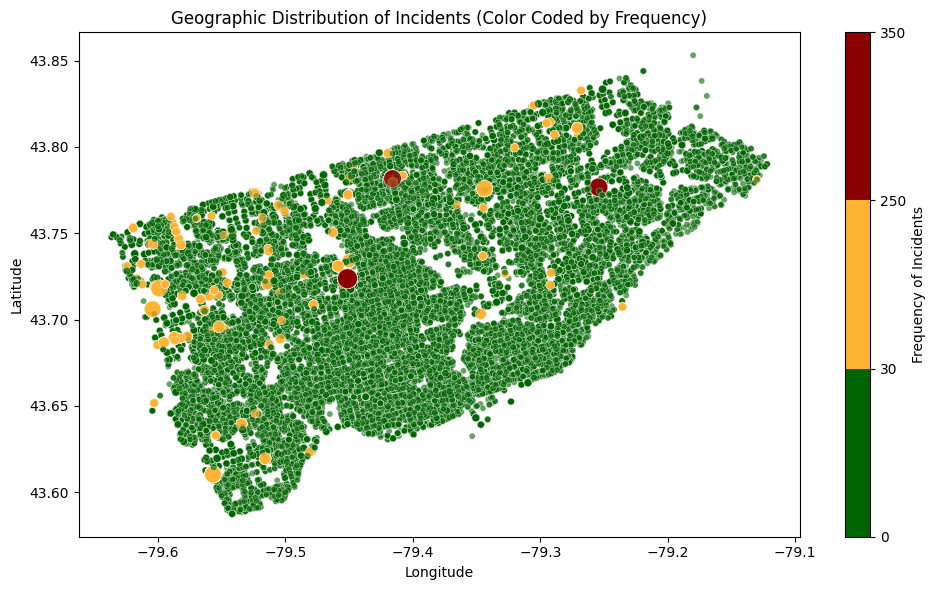


===== Top 10 Most Frequent Incident Locations =====

Geo_Location
-79.4513062, 43.7236571    346
-79.2542411, 43.7766363    290
-79.4159903, 43.781633     265
-79.5991709, 43.7180963    237
-79.5569096, 43.6101506    236
-79.3437465, 43.7758819    228
-79.6042074, 43.7060265    226
-79.4501051, 43.733978     150
-79.5141279, 43.7206421    105
-79.4586396, 43.7309251    100

===== Correlation Matrix =====
                       OCC_YEAR   OCC_DAY   OCC_DOY  OCC_HOUR  LONG_WGS84  \
OCC_YEAR               1.000000  0.000366 -0.041942 -0.050614    0.073160   
OCC_DAY                0.000366  1.000000  0.076077 -0.005412   -0.001582   
OCC_DOY               -0.041942  0.076077  1.000000 -0.001693    0.003060   
OCC_HOUR              -0.050614 -0.005412 -0.001693  1.000000   -0.002338   
LONG_WGS84             0.073160 -0.001582  0.003060 -0.002338    1.000000   
LAT_WGS84              0.037494  0.003682 -0.005110 -0.016461    0.422169   
reporting_delay_hours -0.041679  0.005773  0.018454 

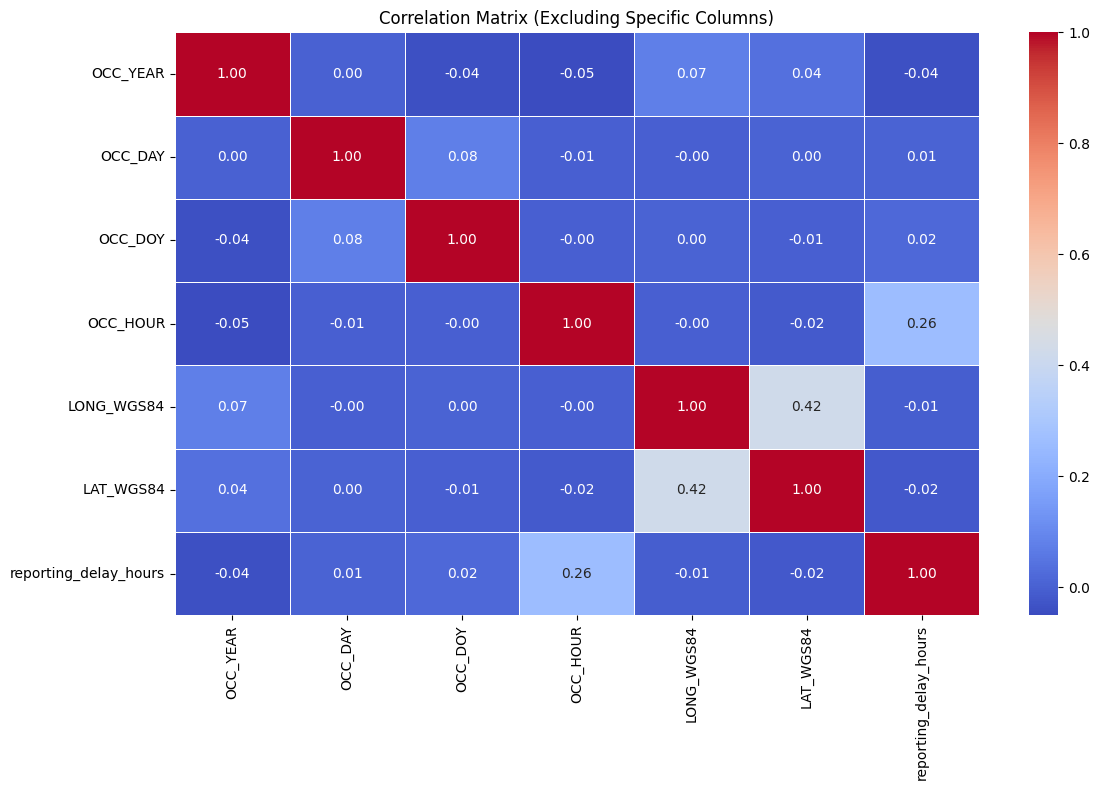


===== Outlier Summary =====
OCC_YEAR: 0 outliers (0.00%)
OCC_DAY: 0 outliers (0.00%)
OCC_DOY: 0 outliers (0.00%)
OCC_HOUR: 0 outliers (0.00%)
LONG_WGS84: 0 outliers (0.00%)
LAT_WGS84: 0 outliers (0.00%)
reporting_delay_hours: 0 outliers (0.00%)


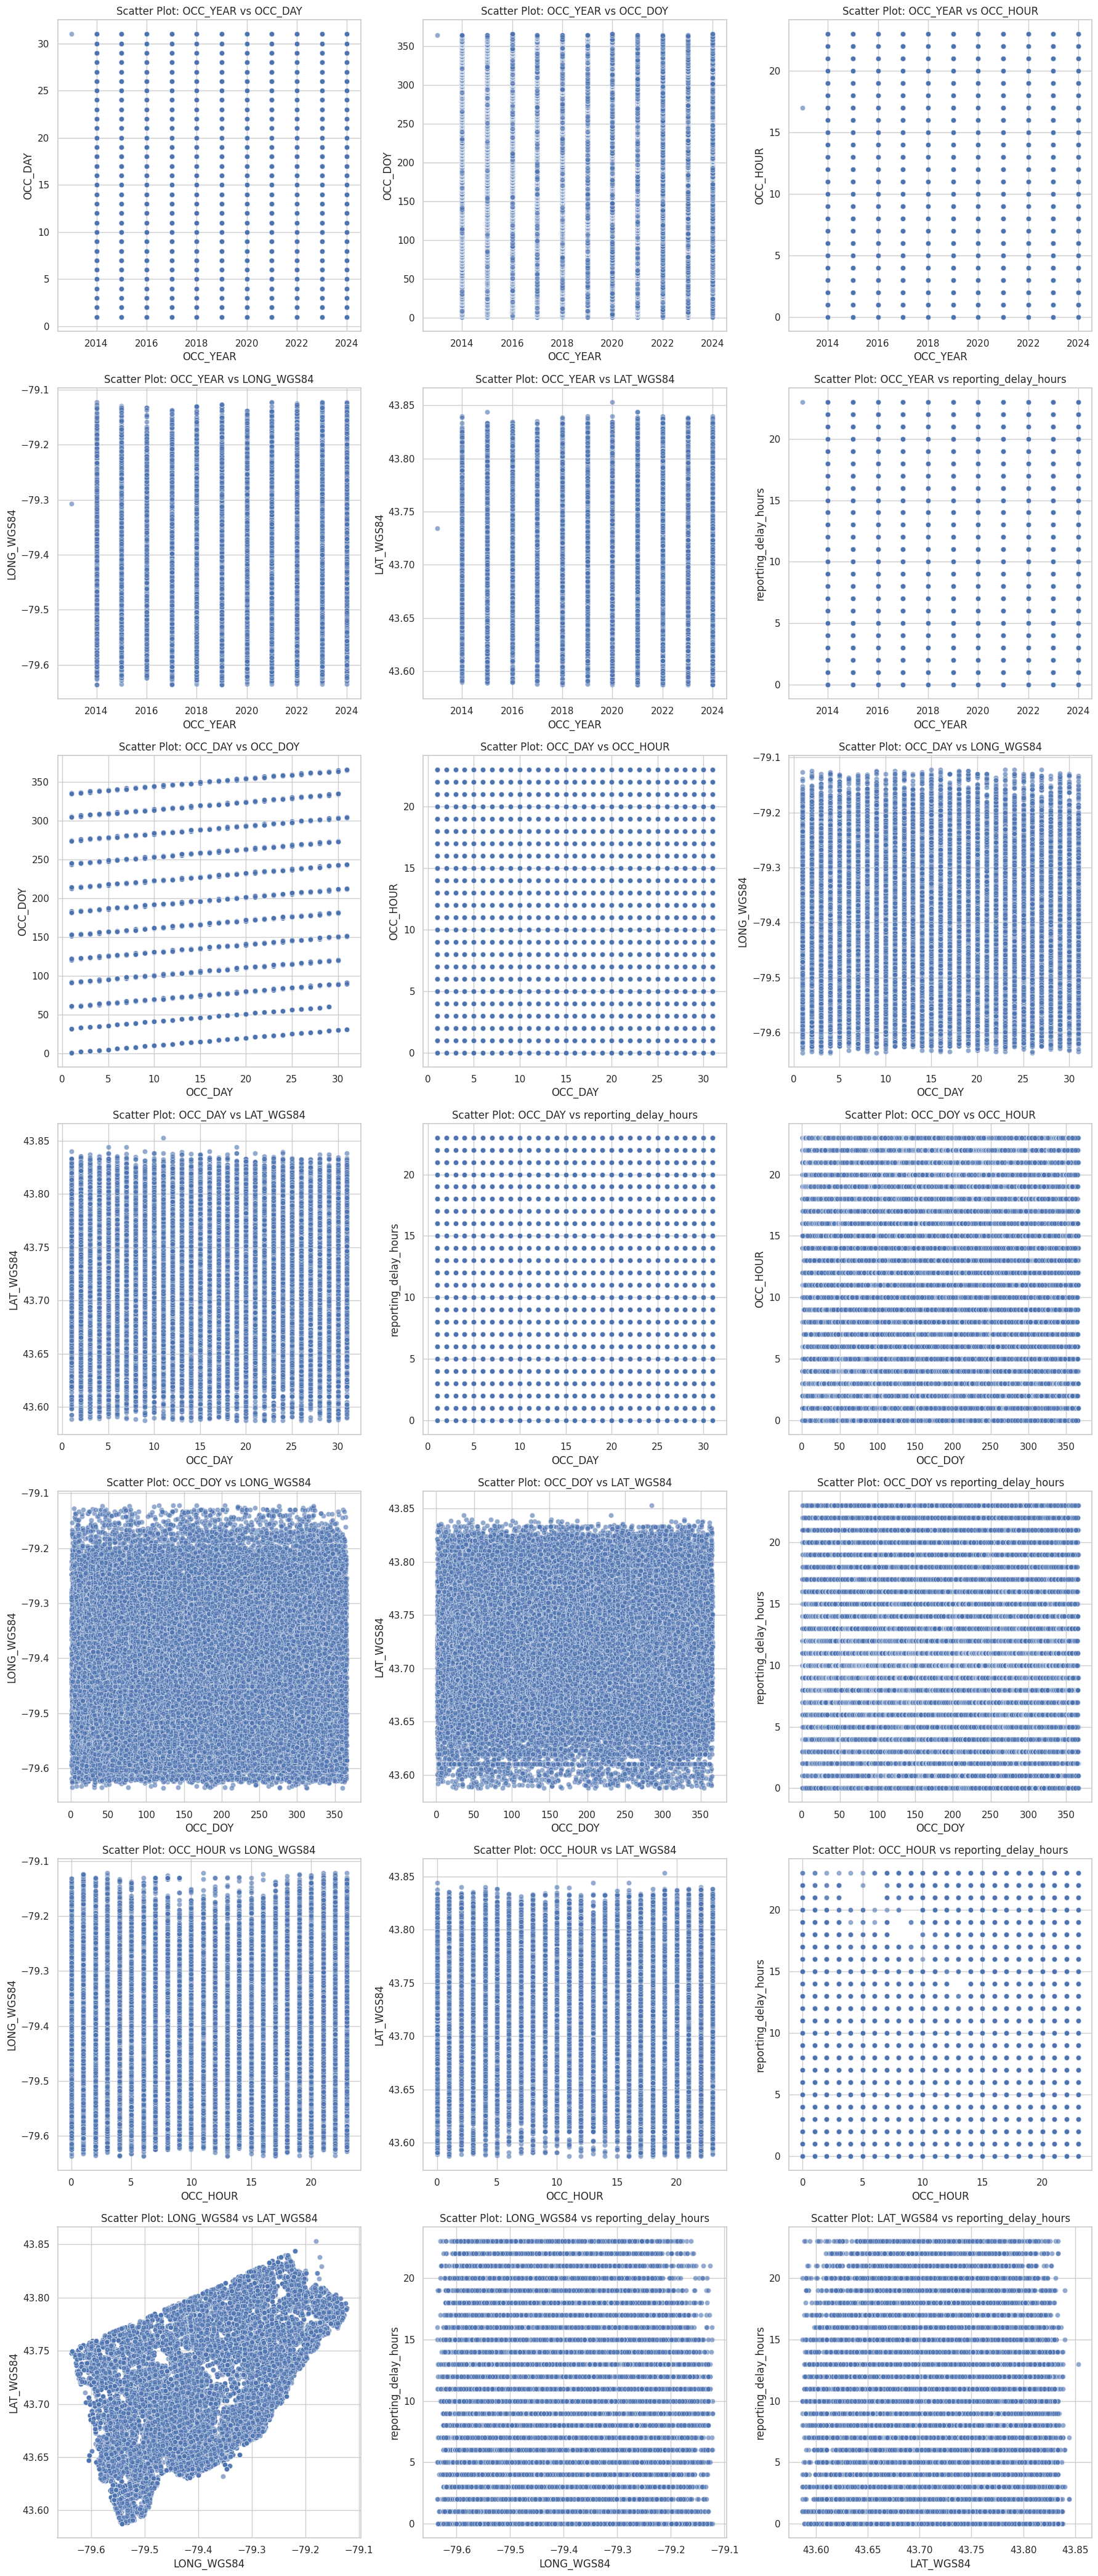


===== Scatter Plot Summaries =====
Scatter Plot: OCC_YEAR vs OCC_DAY | Pearson Correlation: 0.00
Scatter Plot: OCC_YEAR vs OCC_DOY | Pearson Correlation: -0.04
Scatter Plot: OCC_YEAR vs OCC_HOUR | Pearson Correlation: -0.05
Scatter Plot: OCC_YEAR vs LONG_WGS84 | Pearson Correlation: 0.07
Scatter Plot: OCC_YEAR vs LAT_WGS84 | Pearson Correlation: 0.04
Scatter Plot: OCC_YEAR vs reporting_delay_hours | Pearson Correlation: -0.04
Scatter Plot: OCC_DAY vs OCC_DOY | Pearson Correlation: 0.08
Scatter Plot: OCC_DAY vs OCC_HOUR | Pearson Correlation: -0.01
Scatter Plot: OCC_DAY vs LONG_WGS84 | Pearson Correlation: -0.00
Scatter Plot: OCC_DAY vs LAT_WGS84 | Pearson Correlation: 0.00
Scatter Plot: OCC_DAY vs reporting_delay_hours | Pearson Correlation: 0.01
Scatter Plot: OCC_DOY vs OCC_HOUR | Pearson Correlation: -0.00
Scatter Plot: OCC_DOY vs LONG_WGS84 | Pearson Correlation: 0.00
Scatter Plot: OCC_DOY vs LAT_WGS84 | Pearson Correlation: -0.01
Scatter Plot: OCC_DOY vs reporting_delay_hours | Pe

In [1]:
import numpy as np
import warnings
import pandas as pd
from IPython.display import display, HTML
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from scipy import stats

print("\n\n")
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read the data from CSV file once
url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Final_Data.csv"
original_df = pd.read_csv(url, low_memory=False)

# Geographic Scatter Plot
df_geo = original_df.copy()  # Use a copy for geographic analysis

# Calculate the frequency of incidents at each location (rounded to 7 decimal places)
df_geo['Geo_Location'] = df_geo['LONG_WGS84'].round(7).astype(str) + ", " + df_geo['LAT_WGS84'].round(7).astype(str)
location_counts = df_geo['Geo_Location'].value_counts()

# Map frequencies back to the original dataset for color assignment
df_geo['Location_Frequency'] = df_geo['Geo_Location'].map(location_counts)

# Define custom boundaries for the color mapping
boundaries = [0, 30, 250, 350]
colors = ['#006400', '#FFFF00', '#FF6666', '#8B0000']  # Green -> Yellow -> Light Red -> Dark Red
cmap = LinearSegmentedColormap.from_list("custom_green_yellow_red", colors, N=256)
norm = BoundaryNorm(boundaries, cmap.N)

# Scatter plot with color based on location frequency
fig, ax = plt.subplots(figsize=(10, 6))
scatter = sns.scatterplot(x='LONG_WGS84', y='LAT_WGS84', data=df_geo, hue='Location_Frequency', palette=cmap,
                          size='Location_Frequency', sizes=(20, 200), alpha=0.6, legend=None,
                          hue_norm=norm, ax=ax)
ax.set_title("Geographic Distribution of Incidents (Color Coded by Frequency)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Create a colorbar with the custom colormap and boundaries
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for the mappable to allow colorbar creation
fig.colorbar(sm, ax=ax, label="Frequency of Incidents")
plt.tight_layout()
plt.show()

# Top 10 most frequent locations (rounded to 7 decimal places)
print("\n===== Top 10 Most Frequent Incident Locations =====\n")
print(location_counts.head(10).to_string())
print("="*40)

# Correlation Matrix and Heatmap
df_corr = original_df.copy()  # Use a copy for correlation matrix and cleaning
# Drop unwanted columns
df_cleaned = df_corr.drop(columns=['_id', 'EVENT_UNIQUE_ID', 'reporting_delay_days', 'HOOD_158'])

# Convert 'OCC_MONTH' and 'OCC_DOW' to categorical variables
df_cleaned['OCC_MONTH'] = pd.Categorical(df_cleaned['OCC_MONTH'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'], ordered=False)

df_cleaned['OCC_DOW'] = pd.Categorical(df_cleaned['OCC_DOW'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=False)

# Select numerical columns and calculate correlation matrix
df_numerical = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = df_numerical.corr()

# Print textual correlation matrix
print("\n===== Correlation Matrix =====")
print(correlation_matrix)
print("="*40)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Correlation Matrix (Excluding Specific Columns)")
plt.tight_layout()
plt.show()

# Outlier Detection and Scatter Plot Visualizations
df_outliers = df_cleaned.copy()  # Use another copy for outlier detection

sns.set(style="whitegrid")

def detect_outliers(df):
    # Select numeric columns from the dataframe
    numeric_df = df.select_dtypes(include='number')

    # Initialize a DataFrame to store outlier information
    outlier_summary = pd.DataFrame(index=numeric_df.columns, columns=['Outlier Count', 'Outlier Percentage'])

    # Calculate outlier summary for each numeric column (using Z-score method with threshold 3)
    for col in numeric_df.columns:
        z_scores = np.abs(stats.zscore(numeric_df[col]))
        outliers = (z_scores > 3)
        outlier_count = outliers.sum()
        outlier_percentage = (outlier_count / len(numeric_df)) * 100
        outlier_summary.loc[col] = [outlier_count, outlier_percentage]

    # Display the outlier summary as text output
    print("\n===== Outlier Summary =====")
    for col in numeric_df.columns:
        outlier_count = outlier_summary.loc[col, 'Outlier Count']
        outlier_percentage = outlier_summary.loc[col, 'Outlier Percentage']
        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

    # Additional visualizations: Scatter Plots for 2D relationships between numeric columns
    num_cols = len(numeric_df.columns)
    num_plots = (num_cols * (num_cols - 1)) // 2  # Total pairwise scatter plots
    n_rows = num_plots // 3 + (num_plots % 3 > 0)  # Number of rows for the grid

    plt.figure(figsize=(18, 6 * n_rows))
    plot_index = 1
    scatter_texts = []  # To collect summary text for each scatter plot

    for i, col1 in enumerate(numeric_df.columns):
        for j, col2 in enumerate(numeric_df.columns):
            if col1 != col2 and j > i:  # Each pair only once
                plt.subplot(n_rows, 3, plot_index)
                sns.scatterplot(data=numeric_df, x=col1, y=col2, alpha=0.6)
                plt.title(f'Scatter Plot: {col1} vs {col2}')
                plt.xlabel(col1)
                plt.ylabel(col2)

                # Calculate Pearson correlation coefficient
                correlation = numeric_df[col1].corr(numeric_df[col2])
                summary_text = f"Scatter Plot: {col1} vs {col2} | Pearson Correlation: {correlation:.2f}"
                scatter_texts.append(summary_text)
                plot_index += 1

    plt.tight_layout()
    plt.show()

    print("\n===== Scatter Plot Summaries =====")
    for text in scatter_texts:
        print(text)

# Call the outlier detection function
detect_outliers(df_outliers)

print("Outlier detection, visualizations, and correlation calculations completed.")

# Unique Values and Grouping by PREMISES_TYPE
df_unique = original_df.copy()  # Use a copy for examining unique values

# Check each column's unique values
for column in df_unique.columns:
    print(f"Feature: {column}")
    print(f"Unique Values: {df_unique[column].unique()[:10]}")  # Show first 10 unique values
    print(f"Total Unique Values: {len(df_unique[column].unique())}")
    print("="*50)

# Ensure required columns exist
if 'LOCATION_TYPE' not in df_unique.columns or 'PREMISES_TYPE' not in df_unique.columns:
    raise ValueError("Columns 'LOCATION_TYPE' or 'PREMISES_TYPE' are missing in the dataset.")

# Group LOCATION_TYPE by each unique PREMISES_TYPE
grouped_data = df_unique.groupby('PREMISES_TYPE')['LOCATION_TYPE'].unique().reset_index()

# Print the grouped results
for index, row in grouped_data.iterrows():
    print(f"PREMISES_TYPE: {row['PREMISES_TYPE']}")
    print("LOCATION_TYPE values:")
    for loc in row['LOCATION_TYPE']:
        print(f"  - {loc}")
    print("-" * 50)

# Optional: Save the grouped data to a CSV file
# grouped_data.to_csv("Grouped_Location_Premises.csv", index=False)
print("\n\n")
